In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange
import scipy.special as spc

# Dice game stopping at any perfect square

Asked during interview.

Throw a dice and sum up the draws until the sum is a perfect square, or you stop the game winning the budget.

Q1: _say you survived till some $b$, do you keep throwing?_

Imagine $b$ is between two squares, $(n-1)^2$ and $n^2$. Then, one would throw until $b\in\{n^2-6,..,n^2-1\}$.
Throwing again implies throwing until $b\in\{(n+1)^2-6,..,(n+1)^2-1\}$ _if_ $n^2$ was never scored, or hitting $n^2$ and losing.
In terms of rational player, the game stopping rule is:
$$\mathbb E[n^2-c]\ge\mathbb E[(n+1)^2-c]=\mathbb E[(n+1)^2-c|n^2\text{ never scored}]\mathbb P(n^2\text{ never scored}),$$
where in both cases $c$ has expected value 3.5.
$$
n^2 - 3.5 \ge =\frac 56\left(n^2+1+2n-3.5\right)\implies n^2-10n-7.5\ge0.
$$
This inequality is true for $n\ge 10$, so we should stop if $n=94,..,99$.

Q2: _what is the average win of this game?_

Use a dynamic programming approach to compute a value function.
The game is a Markov chain whose states are the budget we are holding in each state.
Terminating states are for sure the perfect squares and 94,..,99.

Just compute recursively:
$$ v(k) = \max\left\{k,\frac 16\sum_{i=k+1}^{k+6} v(i)\right\},$$
the searched value is $v(0)=7.175$

Q2: _how many shots does it averagely take?_

Same way, but think it differently:

$$ N(k) = \begin{cases} 0 & v(k)=k \quad\text{(hitting Snell envelope)} \\
                        1+\frac 16\sum_{i=k+1}^{k+6} N(i) & \text{otherwise} \end{cases}$$

In [58]:
squares = [ i**2 for i in range(1,11) ]
maxn = squares[-1]-1
v = [ 0 ]*(maxn+1)
N = [ 0 ]*(maxn+1)

for k in range(maxn,-1,-1):
    if k in squares:
        continue
    if k > maxn-6:
        v[k] = k
        continue
    v[k] = max(k,sum(v[k+1:k+7])/6)
    
for k in range(maxn,-1,-1):
    if k in squares or k == v[k]:
        continue
    if v[k] > k:
        N[k] = 1+sum(N[k+1:k+7])/6

print('expected win: {:5.3f} and time: {:5.3f}'.format(v[0],N[0]))

expected win: 7.175 and time: 4.356


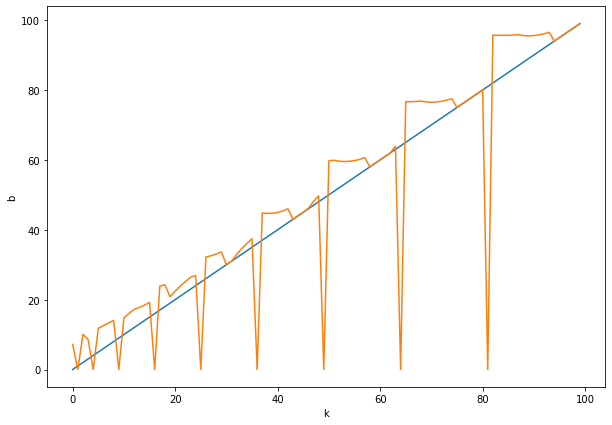

In [61]:
plt.figure(figsize=(10,7))
plt.plot([k for k in range(len(v))], label = 'y=x')
plt.plot(v,label = 'Snell envelope')
plt.xlabel('k')
plt.ylabel('b')
plt.show()

In [54]:
squares = [ i**2 for i in range(1,11) ]
games = 1000000

avgb = 0
avgc = 0
f = []
for game in trange(games,desc = 'games: '):
    b = 0
    c = 0
    while True:
        d = np.random.randint(1,7)
        b += d
        c += 1
        if b in squares:
            f.append(b)
            b = 0
            break
        if b == v[b]:
            f.append(b)
            break
    avgb += b
    avgc += c

print(avgb/games,avgc/games)


7.172247 4.356498
